In [2]:
from database import get_items_list
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions

In [3]:
all_items = []

for n in range(1, 31):
    all_items.extend(get_items_list(n, 100, "").items)

In [4]:
def wanted_items_by_usd(isUsd):
    def wanted_items(item):
        title = item.title.lower()
        desc = item.description.lower()
        text = title + " " + desc
        if (item.deleted == False and
            item.usd == isUsd and
            "macbook"    in text and
            "pro"        in text and
            "air"        not in text and
            "placa"      not in text and
            "imac"       not in text and
            "ipad"       not in text and
            "phone"      not in text and
            "repuesto"   not in text and
            item.price_usd != 111   and
            item.price_usd != 222   and
            item.price_usd != 333   and
            item.price_usd != 444   and
            item.price_usd != 555   and
            item.price_usd != 666   and
            item.price_usd != 777   and
            item.price_usd != 888   and
            item.price_usd != 999   and
            item.price_usd != 1111  and
            item.price_usd != 2222  and
            item.price_usd != 3333  and
            item.price_usd != 4444  and
            item.price_usd >  100   and
            item.price_usd <  1400):
            return True
        return False
    return wanted_items

def calculate_prices_usd(isUsd):
    filtered_items = filter(wanted_items_by_usd(isUsd), all_items)
    filtered_items = sorted(filtered_items, key=lambda i: i.price_usd)
    # if isUsd:
    #     filtered_items *= 7 # times more items if it is USD
    
    prices_usd = []
    
    for item in filtered_items:
        prices_usd.append(item.price_usd)
        # print(item.title.ljust(100), item.price_usd)
    
    return prices_usd

def calculate_and_print_for(currency, bins):
    if currency == "USD":
        prices = calculate_prices_usd(True)
        count = len(prices)
        print("Count Items USD: ", count)
    elif currency == "ARS":
        prices = calculate_prices_usd(False)
        count = len(prices)
        print("Count Items ARS: ", count)
    elif currency == "ALL":
        prices = []
        prices += calculate_prices_usd(True)
        prices += calculate_prices_usd(False)
        count = len(prices)
        print("Count Items ALL: ", count)
    else:
        raise Exception(f"Unknown currency {currency}")
    counts, bins, bars = plt.hist(prices, bins)
    return (prices, (counts, bins, bars),)

Count Items USD:  349


2024-09-03 15:10:40.052 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.0)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,4.766131e-07,150.57988,158.290023,0.035656,0.075138,0.036877


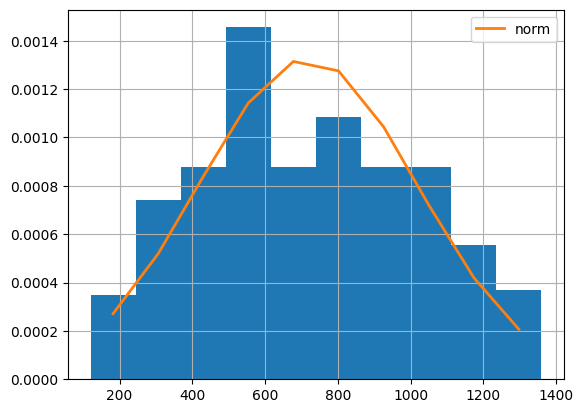

In [5]:
usd_bins = 10

items_usd, usd_hist = calculate_and_print_for("USD", usd_bins)

dists = ["norm"]

f = Fitter(items_usd,
           distributions = dists,
           bins = usd_bins)
f.fit()
f.summary()

Count Items ARS:  384


2024-09-03 15:10:42.503 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=4e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000004,456.633292,468.485219,0.130149,0.04668,0.361565


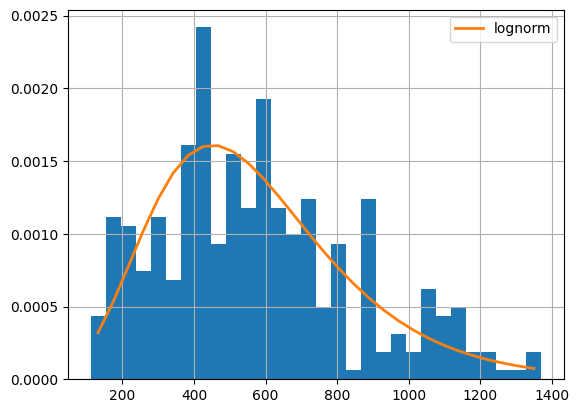

In [6]:
ars_bins = 30

items_ars, ars_hist = calculate_and_print_for("ARS", ars_bins)

dists = ["lognorm"]

f = Fitter(items_ars,
           distributions = dists,
           bins = ars_bins)
f.fit()
f.summary()